<a href="https://colab.research.google.com/github/zachmakki15/IDS/blob/main/Project6_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zach Makki

Intro Data Science

Project #6

Problem #1

04/17/2022

#Problem 1 (Python Decision Tree Model) 

##Import Dataset

Import the dataset and do quick analysis such as displaying the top of it and descrbing the numeric columns.

In [ ]:
#Import the needed python libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Import the dataset in python
dataFrame = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14797 entries, 0 to 14796
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             14797 non-null  int64 
 1   workclass       14797 non-null  object
 2   education       14797 non-null  int64 
 3   marital-status  14797 non-null  object
 4   occupation      14797 non-null  object
 5   sex             14797 non-null  object
 6   capital-gain    14797 non-null  int64 
 7   capital-loss    14797 non-null  int64 
 8   income          14797 non-null  object
dtypes: int64(4), object(5)
memory usage: 1.0+ MB


In [ ]:
#Describe the numeric attributes
dataFrame.describe()

,age,education,capital-gain,capital-loss
count,14797.000000,14797.000000,14797.000000,14797.000000
mean,38.687437,10.068798,1066.581604,88.580793
std,13.678875,2.598297,7255.455373,406.322208
min,17.000000,1.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000


In [ ]:
#Show the top of the dataset
dataFrame.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K


##Data Cleaning

Data cleaning will include checking for nulls, displaying historgrams for numeric columns, and encoding the categoric columns, as well as calcuating a new column capital-gaines-losses.

In [ ]:
#First check for nulls
dataFrame.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
sex               0
capital-gain      0
capital-loss      0
income            0
dtype: int64

No nulls have been found in any attribute, therefore no imputing is needed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10e0c33c10>,
      dtype=object)

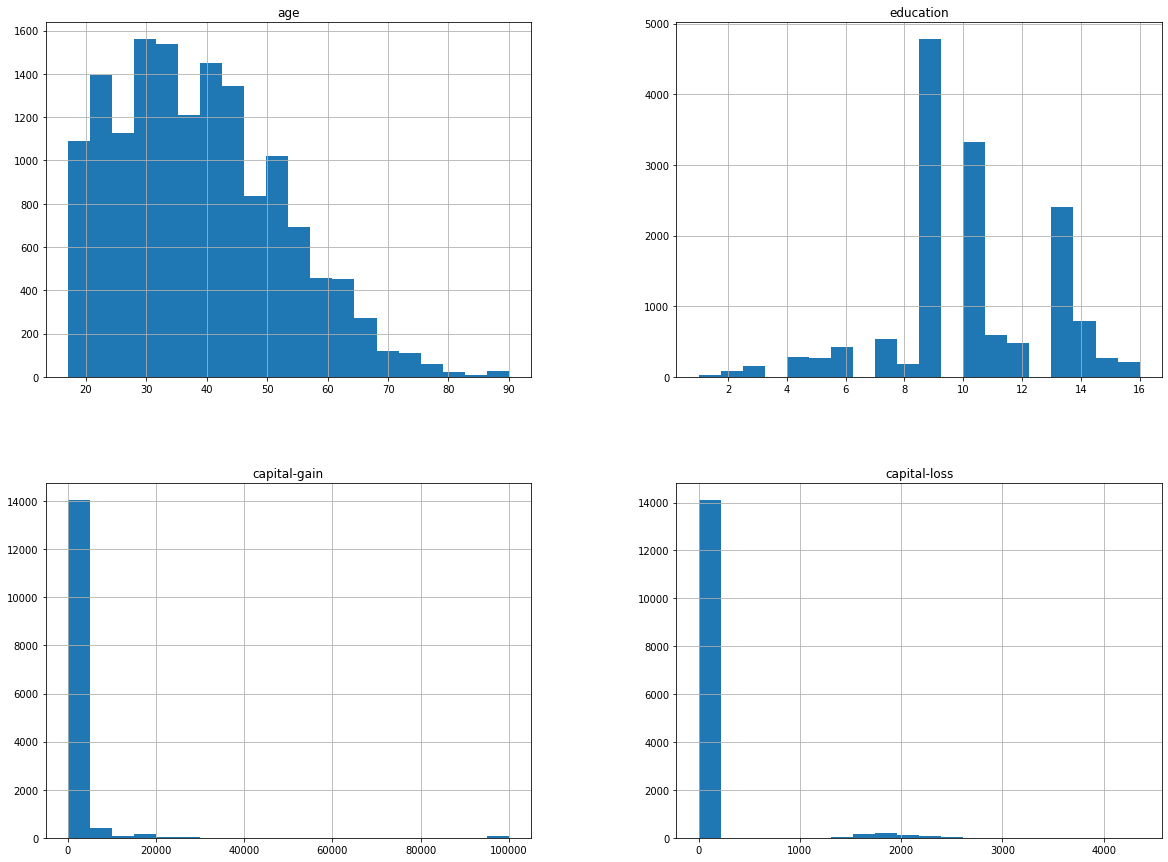

In [ ]:
#View numeric atttribute distribution
dataFrame.hist(bins=20, figsize=(20,15))

Of the numeric attributes both capital gain and capital loss are mostly zero. Due to this and my limited knowledge of what capital gains and losses are, my null hypothesis is that those in that dataset with a capital loss and gain of 0 are more likley to have income under 50k. 

<=50K    11243
>50K      3554
Name: income, dtype: int64


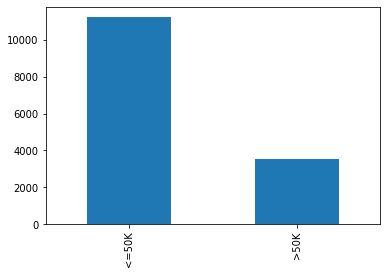

In [ ]:
#Examine distribution of the target attribute
dataFrame['income'].value_counts().plot.bar()
print(dataFrame['income'].value_counts())

There are far more samples in this dataset for under 50k then there are for over 50k. This will cause the DT model to learn about earners under 50k better then those over 50k.

In [ ]:
#Encode categoric attributes
from sklearn import preprocessing
categoric_df = dataFrame[['workclass', 'marital-status', 'occupation', 'sex', 'income']]
myencoder = preprocessing.LabelEncoder()

#Encode dataframe
for i in range(0, categoric_df.shape[1]):
  categoric_df[categoric_df.columns[i]] = myencoder.fit_transform(categoric_df[categoric_df.columns[i]])

#View top of dataframe
categoric_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,workclass,marital-status,occupation,sex,income
0,6,2,4,1,0
1,4,0,6,1,0
2,4,3,8,0,0
3,6,2,4,1,1
4,4,4,10,0,1


In [ ]:
#Add non-categoric attributes to dataFrame encoded to restore full dataset
categoric_df['age'] = dataFrame['age']
categoric_df['education'] = dataFrame['education']
categoric_df['capital-gain'] = dataFrame['capital-gain']
categoric_df['capital_loss'] = dataFrame['capital-loss']
categoric_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,workclass,marital-status,occupation,sex,income,age,education,capital-gain,capital_loss
0,6,2,4,1,0,50,13,0,0
1,4,0,6,1,0,38,9,0,0
2,4,3,8,0,0,49,5,0,0
3,6,2,4,1,1,52,9,0,0
4,4,4,10,0,1,31,14,14084,0


Now that the full dataset has been restored after encoding thr categoric attributes the dataset is ready for splitting.

In [ ]:
#Split data into train/test
from sklearn.model_selection import train_test_split

##Do same dimension reduction done in decision_tree example, add one attribute then only use 3 for x
categoric_df['capital-gains-losses'] = categoric_df['capital-gain'] + abs(categoric_df['capital_loss'])
x = categoric_df[['capital-gains-losses', 'marital-status']]
y = categoric_df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, shuffle=True, test_size=0.30, stratify=y)

##Create DT Functions

The four fucntions created below are

makeDTmodel used to create a decision tree, users can select critiera, max leaf nodes, and max depth of the tree.

displayTree used to display the decision tree

createCM used to create a heap map of the trees confusion matrix

compareModels used to graph the training/tesing accuracy of two trees

In [ ]:
#Import libraries needed for DT model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Create DT Model function
def makeDTModel(critiera, x, y, max_leaf_nodes=0, max_depth=0):
  if (max_leaf_nodes > 0 and max_depth > 0):
    classifier = DecisionTreeClassifier(criterion = critiera, max_leaf_nodes=max_leaf_nodes, max_depth=max_depth, random_state = 42).fit(x, y)
    return classifier
  else:
    if (max_leaf_nodes > 0):
      classifier = DecisionTreeClassifier(criterion = critiera, max_leaf_nodes=max_leaf_nodes, random_state = 42).fit(x, y)
      return classifier
    if (max_depth > 0):
      classifier = DecisionTreeClassifier(criterion = critiera, max_depth=max_depth, random_state = 42).fit(x, y)
      return classifier
    if (max_leaf_nodes == 0 and max_depth == 0):
      classifier = DecisionTreeClassifier(criterion = critiera, random_state = 42).fit(x, y)
      return classifier

In [ ]:
#Create function for displaying tree
from matplotlib.pyplot import figure
def displayTree(classifier, x, class_names):
  figure(figsize=(20, 15))
  tree.plot_tree(classifier, feature_names=x.columns.values.tolist(), class_names=class_names, filled=True)
  text_representation = tree.export_text(classifier, feature_names=x.columns.values.tolist())
  print(text_representation)

In [ ]:
#Create function for displyaing tree confusion matrix in a heat map
from sklearn.metrics import confusion_matrix
def createCM(classifier, labels, x_test, y_test):
  plt.figure(figsize=(10,10))
  y_pred = classifier.predict(x_test)
  confusionMatrix = confusion_matrix(y_test, y_pred, labels=labels)
  print ('Confusion matrix:')
  print(confusionMatrix)
  pd.DataFrame(confusionMatrix, index=labels, columns=labels)
  sns.heatmap(confusionMatrix, annot=True, linewidths=.5, square = True, cmap="BuPu", fmt='0.4g')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')

In [ ]:
#Create function to compare the CART and C5 models
def compareModels(cart_classifier, c5_classifier, x_train, y_train, x_test, y_test):
  labels = ['CART', 'C5.0']
  training_scores = [round(cart_classifier.score(x_train, y_train),2), round(c5_classifier.score(x_train, y_train),2)]
  testing_scores =  [round(cart_classifier.score(x_test, y_test),2), round(c5_classifier.score(x_test, y_test),2)]

  x = np.arange(len(labels))
  width = 0.15
  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training Accuracy', color='lime')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing Accuracy', color='pink')
  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('DT Classifier Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.4, 1.0), loc='upper right')
  plt.title('DT Classifier Comparison')
  plt.show()

##Use DT Functions

##No max depth or max leaf nodes

Start by creating a gini and entropy tree with no limits on depth or leaf nodes.

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- capital-gains-losses <= 4668.50
|   |   |   |   |--- capital-gains-losses <= 2232.00
|   |   |   |   |   |--- capital-gains-losses <= 1758.50
|   |   |   |   |   |   |--- capital-gains-losses <= 1748.00
|   |   |   |   |   |   |   |--- capital-gains-losses <= 1577.00
|   |   |   |   |   |   |   |   |--- capital-gains-losses <= 1535.00
|   |   |   |   |   |   |   |   |   |--- capital-gains-losses <= 106.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- capital-gains-losses >  106.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- capital-gains-losses >  1535.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- capital-gains-losses >  1577.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- capital-gains-losses >  1748.0

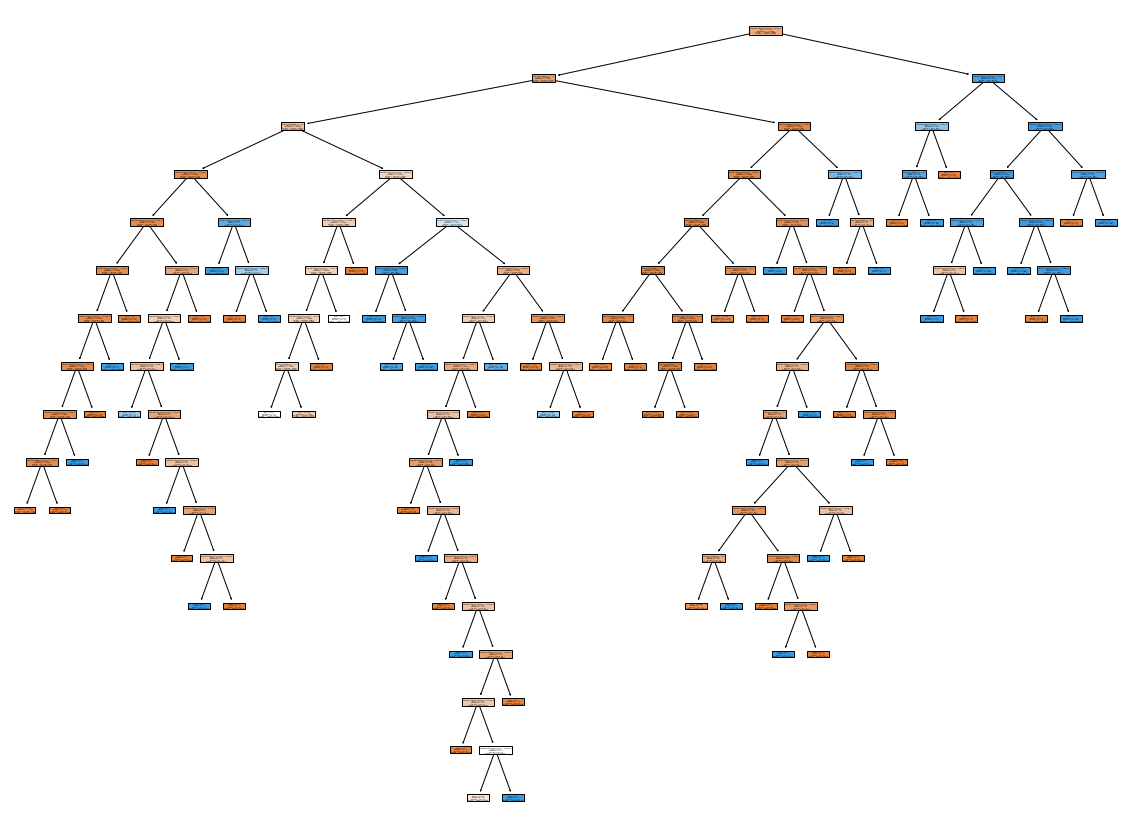

In [ ]:
#Cart tree
class_names = ['Low Income', 'High Income']
cart_classifier = makeDTModel("gini", x_train, y_train)
displayTree(cart_classifier, x_train, class_names)

Confusion matrix:
[[3366    8]
 [ 744  322]]


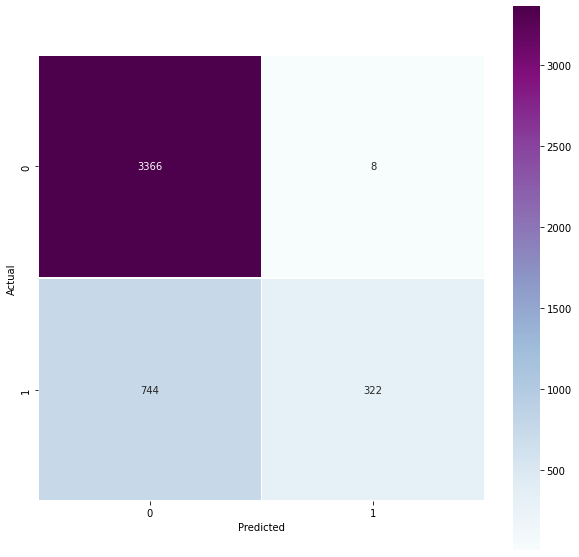

In [ ]:
#Cart confusion matrix
labels = [0, 1]
createCM(cart_classifier, labels, x_test, y_test)

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- capital-gains-losses <= 4668.50
|   |   |   |   |--- capital-gains-losses <= 2232.00
|   |   |   |   |   |--- capital-gains-losses <= 1758.50
|   |   |   |   |   |   |--- capital-gains-losses <= 1748.00
|   |   |   |   |   |   |   |--- capital-gains-losses <= 1577.00
|   |   |   |   |   |   |   |   |--- capital-gains-losses <= 1535.00
|   |   |   |   |   |   |   |   |   |--- capital-gains-losses <= 106.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- capital-gains-losses >  106.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- capital-gains-losses >  1535.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- capital-gains-losses >  1577.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- capital-gains-losses >  1748.0

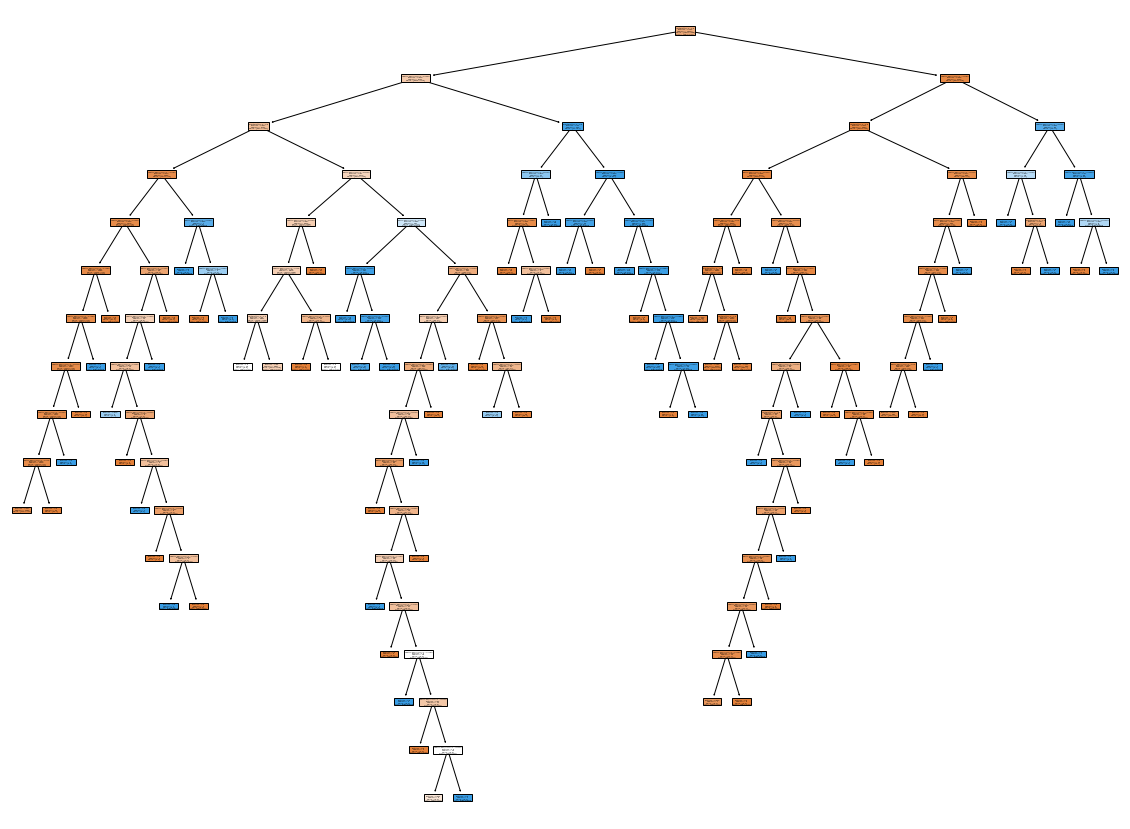

In [ ]:
#C5
c5_classifier = makeDTModel("entropy", x_train, y_train)
displayTree(c5_classifier, x_train, class_names)

Confusion matrix:
[[3362   12]
 [ 744  322]]


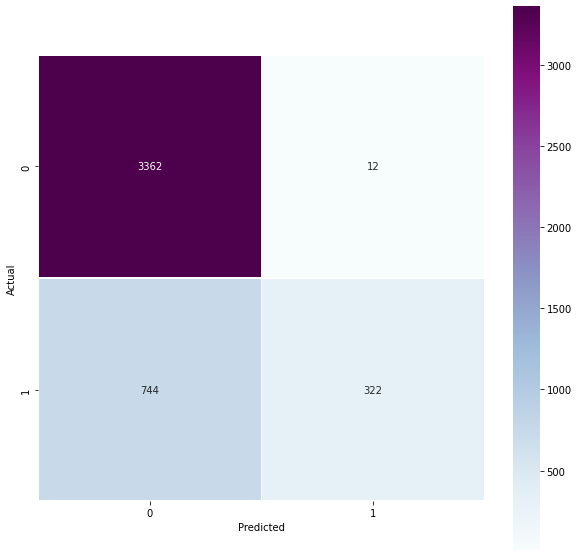

In [ ]:
#C5 confusion matrix
createCM(c5_classifier, labels, x_test, y_test)

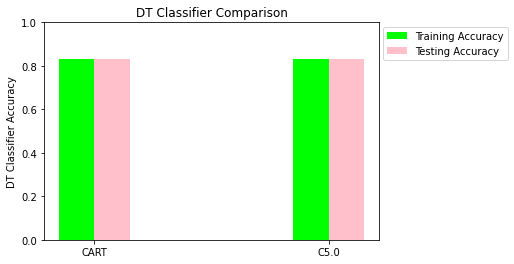

In [ ]:
#Compare the two models
compareModels(cart_classifier, c5_classifier, x_train, y_train, x_test, y_test)

With no depth limits the trees grew considerably and had a final classification accuracy in both training and testing of about 82%. This score was the same for both CART and C5.0.

In the next section max depths of 2,3,4 will be tried for both gini and entropy trees.

##Max Depth = 2

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- class: 0
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- capital-gains-losses <= 7073.50
|   |   |--- class: 1
|   |--- capital-gains-losses >  7073.50
|   |   |--- class: 1



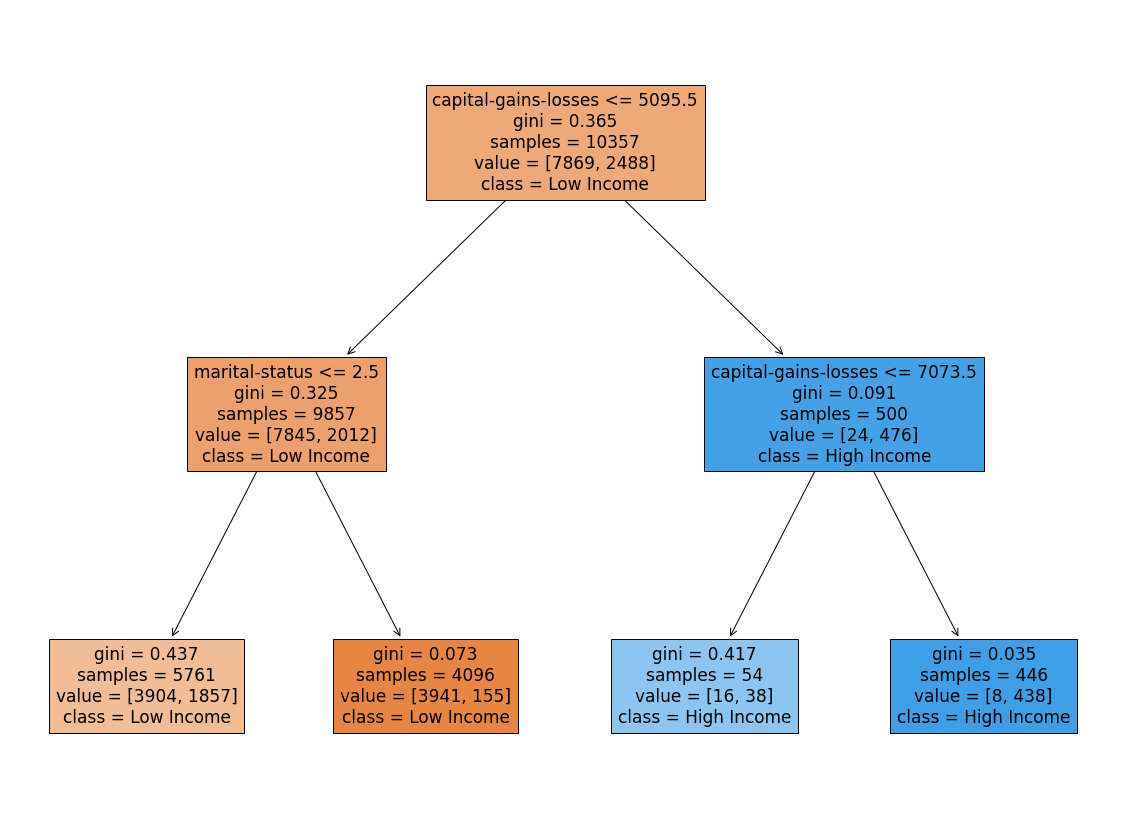

In [ ]:
#Cart Classifier
cart_classifier_md2 = makeDTModel("gini", x_train, y_train, max_depth=2)
displayTree(cart_classifier_md2, x_train, class_names)

Confusion matrix:
[[3361   13]
 [ 859  207]]


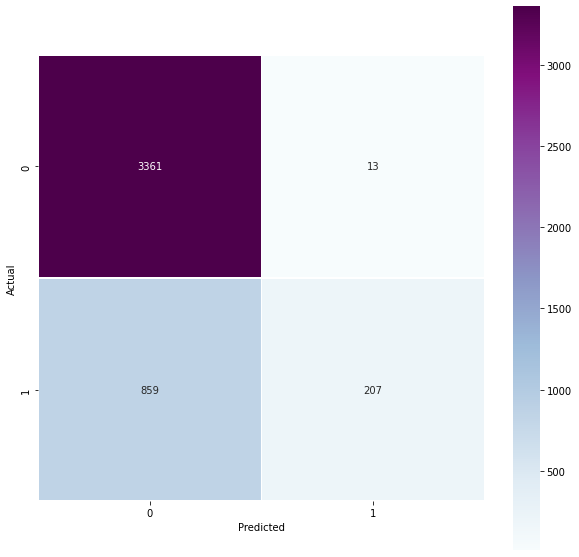

In [ ]:
#Cart confusion matrix
createCM(cart_classifier_md2, labels, x_test, y_test)

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- capital-gains-losses <= 4718.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  4718.50
|   |   |--- class: 1



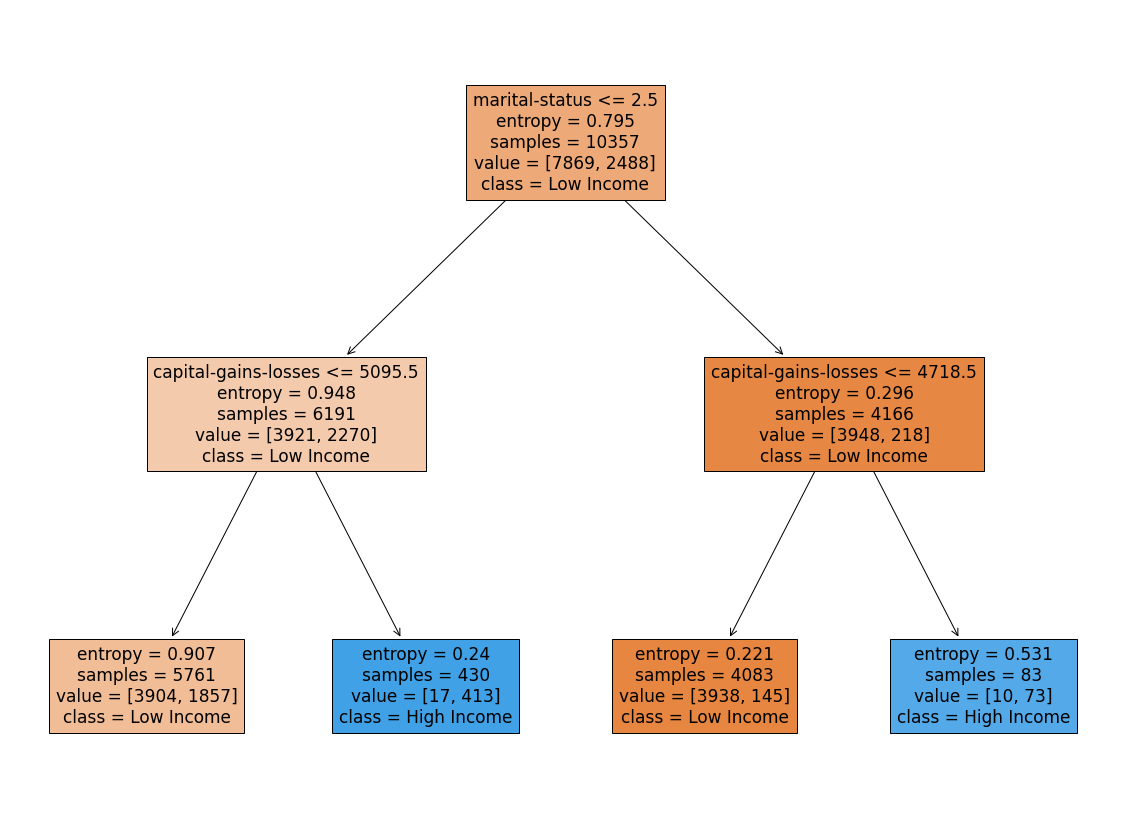

In [ ]:
#C5
c5_classifier_md2 = makeDTModel("entropy", x_train, y_train, max_depth=2)
displayTree(c5_classifier_md2, x_train, class_names)

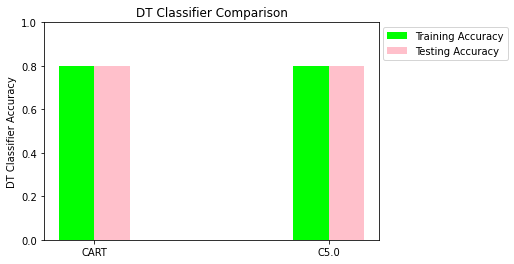

In [ ]:
#Compare max_depth = 2 models
compareModels(cart_classifier_md2, c5_classifier_md2, x_train, y_train, x_test, y_test)

For a max depth of 2 the trees classification accuracy was about 79%, showing not much of a drop off from the 82% accuracy with the tree with no depth limit.

##Max_Depth = 3

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- marital-status >  2.50
|   |   |--- capital-gains-losses <= 4718.50
|   |   |   |--- class: 0
|   |   |--- capital-gains-losses >  4718.50
|   |   |   |--- class: 1
|--- capital-gains-losses >  5095.50
|   |--- capital-gains-losses <= 7073.50
|   |   |--- capital-gains-losses <= 6457.50
|   |   |   |--- class: 1
|   |   |--- capital-gains-losses >  6457.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  7073.50
|   |   |--- capital-gains-losses <= 30961.50
|   |   |   |--- class: 1
|   |   |--- capital-gains-losses >  30961.50
|   |   |   |--- class: 1



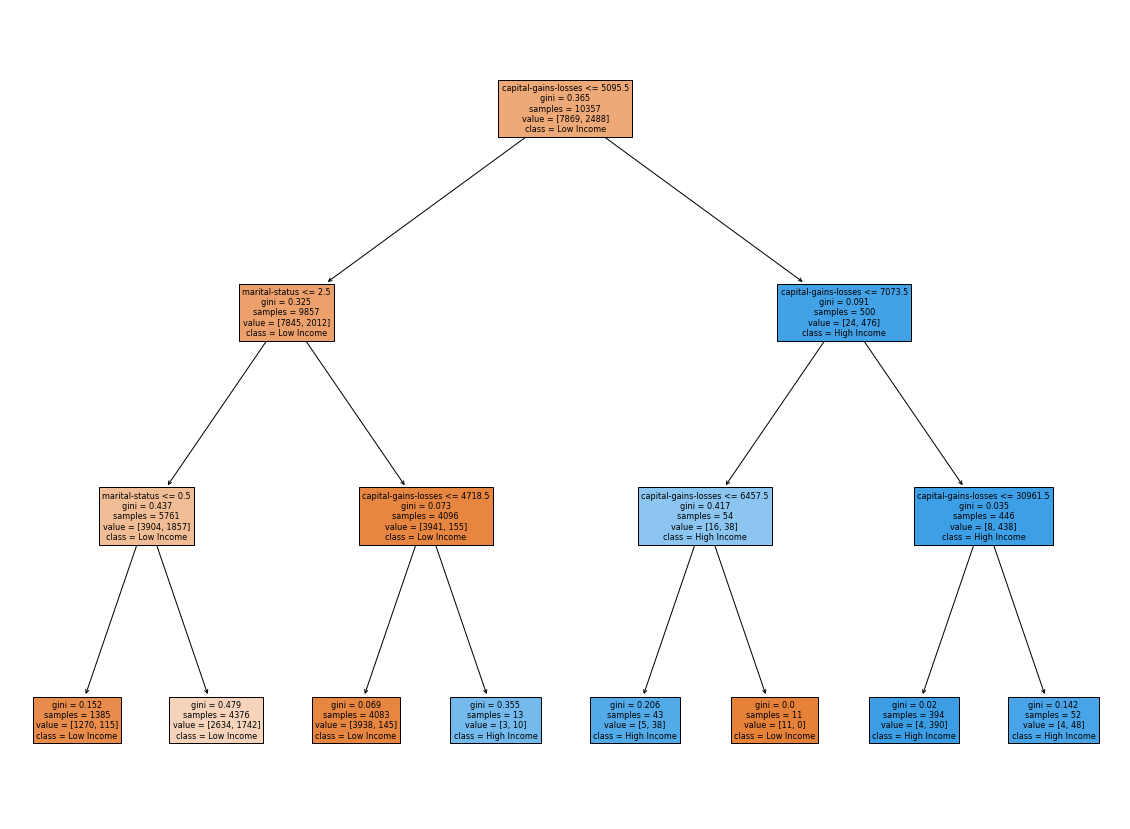

In [ ]:
#Cart
cart_classifier_md3 = makeDTModel("gini", x_train, y_train, max_depth=3)
displayTree(cart_classifier_md3, x_train, class_names)

Confusion matrix:
[[3364   10]
 [ 859  207]]


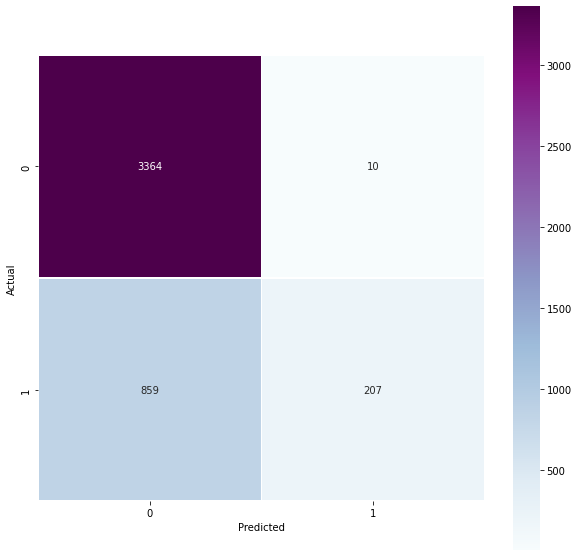

In [ ]:
#Cart md3 confusion matrix
createCM(cart_classifier_md3, labels, x_test, y_test)

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 1
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 1
|--- marital-status >  2.50
|   |--- capital-gains-losses <= 4718.50
|   |   |--- marital-status <= 5.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  5.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  4718.50
|   |   |--- capital-gains-losses <= 7372.50
|   |   |   |--- class: 1
|   |   |--- capital-gains-losses >  7372.50
|   |   |   |--- class: 1



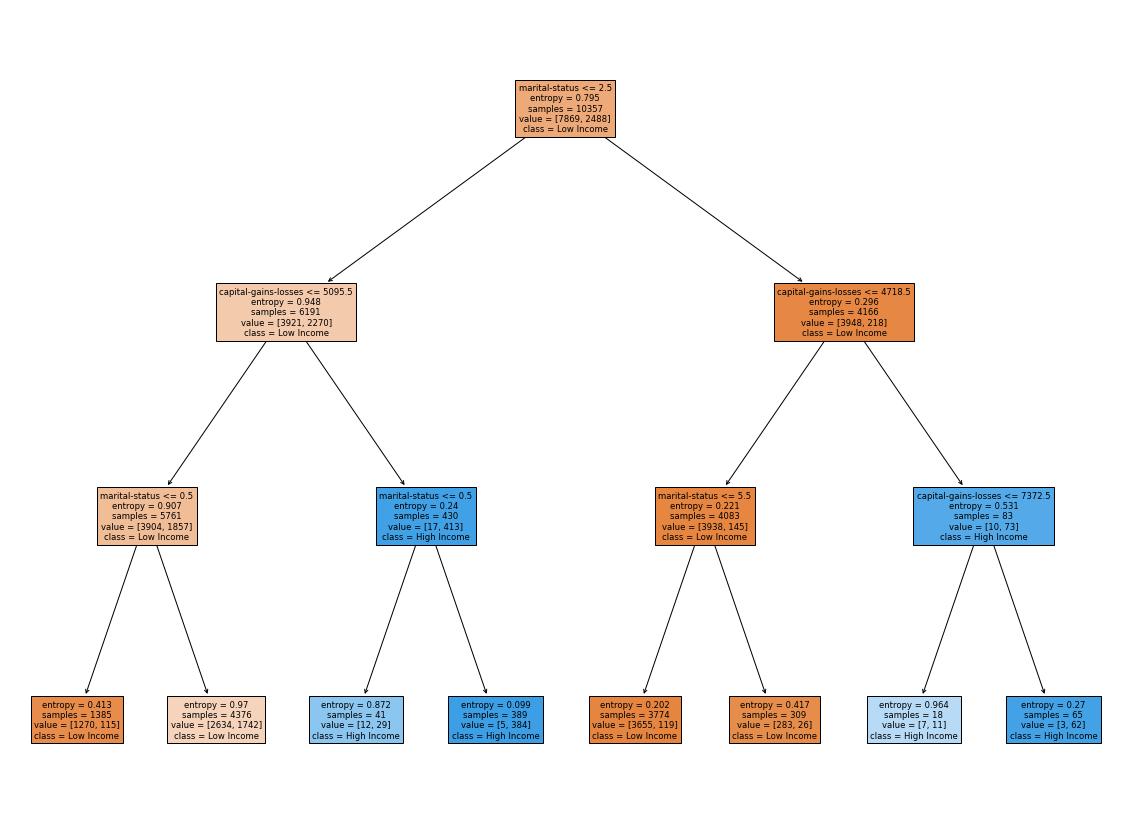

In [ ]:
#C5
c5_classifier_md3 = makeDTModel("entropy", x_train, y_train, max_depth=3)
displayTree(c5_classifier_md3, x_train, class_names)

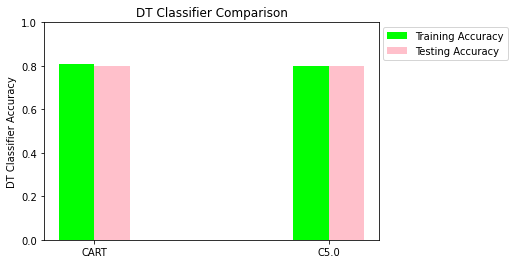

In [ ]:
#Compare md3 models
compareModels(cart_classifier_md3, c5_classifier_md3, x_train, y_train, x_test, y_test)

##Max_Depth = 4

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- capital-gains-losses <= 4668.50
|   |   |   |   |--- class: 0
|   |   |   |--- capital-gains-losses >  4668.50
|   |   |   |   |--- class: 1
|   |   |--- marital-status >  0.50
|   |   |   |--- capital-gains-losses <= 1822.50
|   |   |   |   |--- class: 0
|   |   |   |--- capital-gains-losses >  1822.50
|   |   |   |   |--- class: 1
|   |--- marital-status >  2.50
|   |   |--- capital-gains-losses <= 4718.50
|   |   |   |--- capital-gains-losses <= 1534.00
|   |   |   |   |--- class: 0
|   |   |   |--- capital-gains-losses >  1534.00
|   |   |   |   |--- class: 0
|   |   |--- capital-gains-losses >  4718.50
|   |   |   |--- capital-gains-losses <= 4826.00
|   |   |   |   |--- class: 1
|   |   |   |--- capital-gains-losses >  4826.00
|   |   |   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- capital-gains-losses <= 7073.50
|   |   |--- capital-gains-

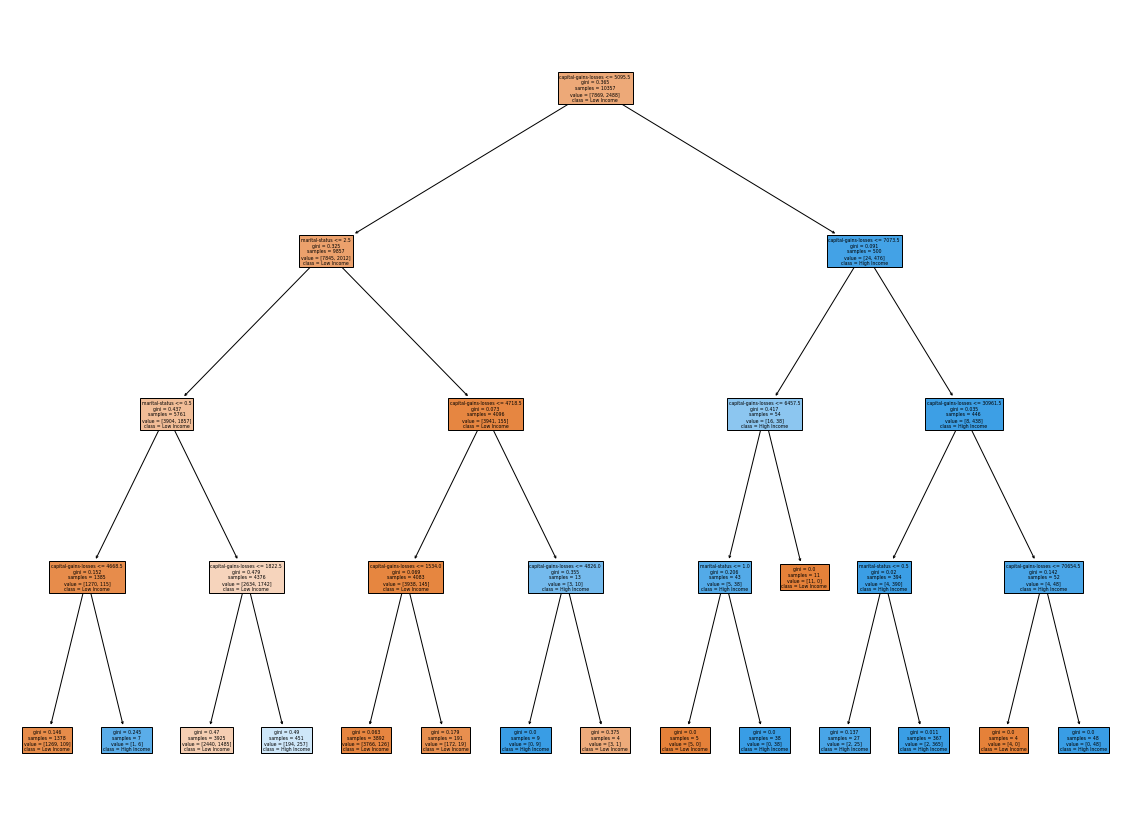

In [ ]:
#Cart
cart_classifier_md4 = makeDTModel("gini", x_train, y_train, max_depth=4)
displayTree(cart_classifier_md4, x_train, class_names)

Confusion matrix:
[[3295   79]
 [ 751  315]]


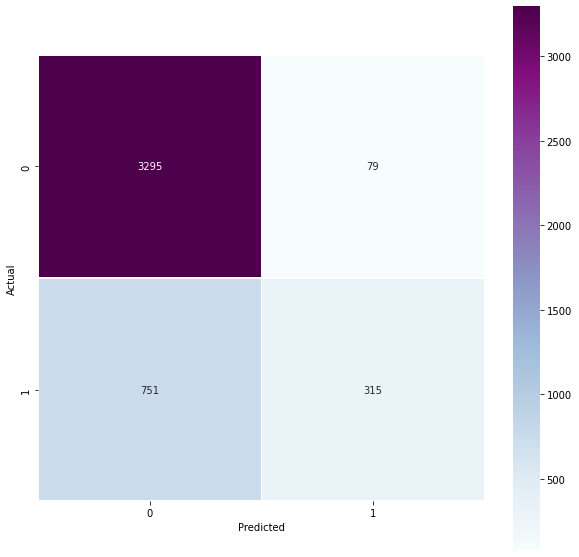

In [ ]:
#Cart md4 confusion matrix
createCM(cart_classifier_md4, labels, x_test, y_test)

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- capital-gains-losses <= 4668.50
|   |   |   |   |--- class: 0
|   |   |   |--- capital-gains-losses >  4668.50
|   |   |   |   |--- class: 1
|   |   |--- marital-status >  0.50
|   |   |   |--- capital-gains-losses <= 1822.50
|   |   |   |   |--- class: 0
|   |   |   |--- capital-gains-losses >  1822.50
|   |   |   |   |--- class: 1
|   |--- capital-gains-losses >  5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- capital-gains-losses <= 8770.00
|   |   |   |   |--- class: 0
|   |   |   |--- capital-gains-losses >  8770.00
|   |   |   |   |--- class: 1
|   |   |--- marital-status >  0.50
|   |   |   |--- capital-gains-losses <= 7032.50
|   |   |   |   |--- class: 1
|   |   |   |--- capital-gains-losses >  7032.50
|   |   |   |   |--- class: 1
|--- marital-status >  2.50
|   |--- capital-gains-losses <= 4718.50
|   |   |--- marital-status <= 5.50
|   |   |

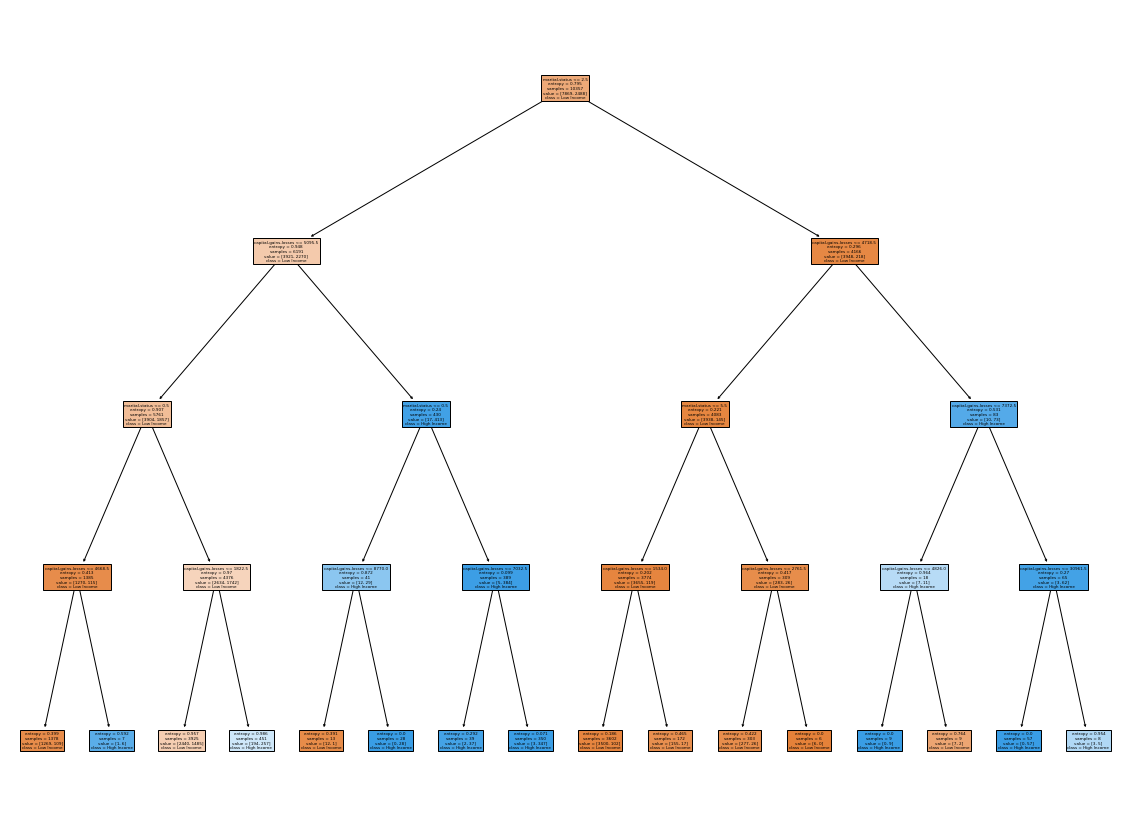

In [ ]:
#C5
c5_classifier_md4 = makeDTModel("entropy", x_train, y_train, max_depth=4)
displayTree(c5_classifier_md4, x_train, class_names)

Confusion matrix:
[[3293   81]
 [ 756  310]]


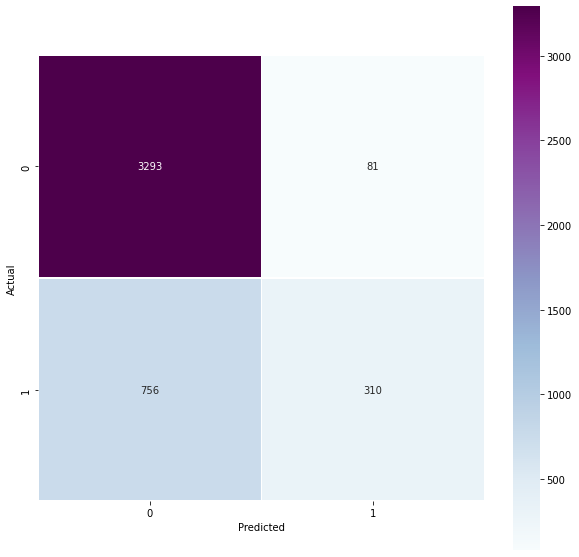

In [ ]:
#C5 md4 confusion matrix
createCM(c5_classifier_md4, labels, x_test, y_test)

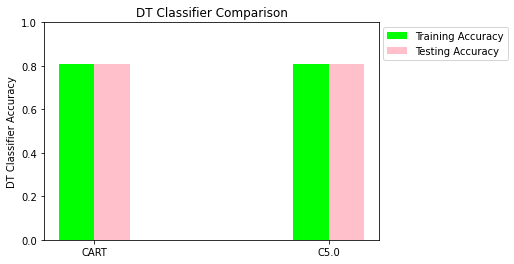

In [ ]:
#Compare md4 models
compareModels(cart_classifier_md4, c5_classifier_md4, x_train, y_train, x_test, y_test)

In this section max leaf nodes will be limited to 3,4 and 5 for both gini and entropy decision trees.

##Max_Leaf_Nodes = 3

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- class: 0
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1



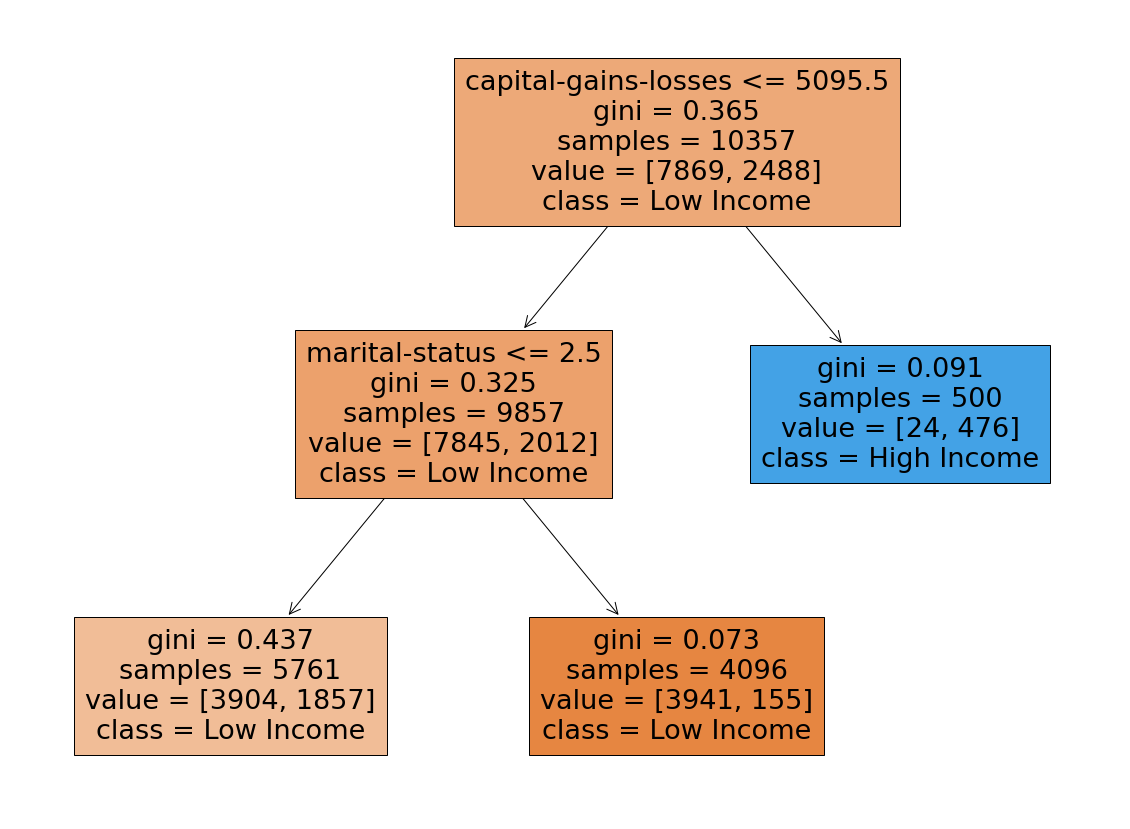

In [ ]:
#Cart
cart_classifier_mln3 = makeDTModel("gini", x_train, y_train, max_leaf_nodes=3)
displayTree(cart_classifier_mln3, x_train, class_names)

Confusion matrix:
[[3361   13]
 [ 859  207]]


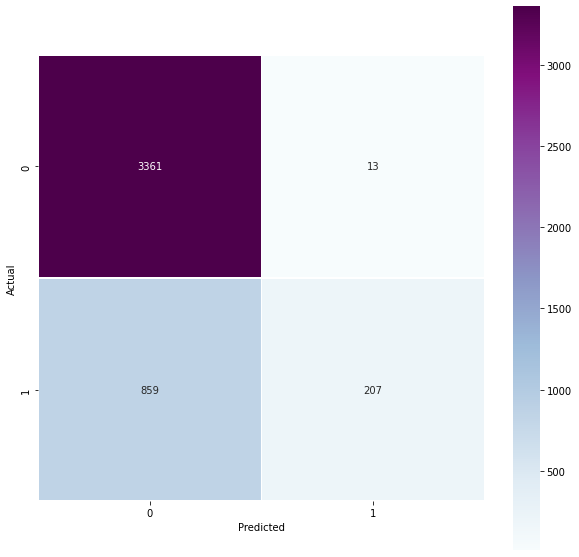

In [ ]:
#Cart mln 3 confusion matrix
createCM(cart_classifier_mln3, labels, x_test, y_test)

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- class: 0



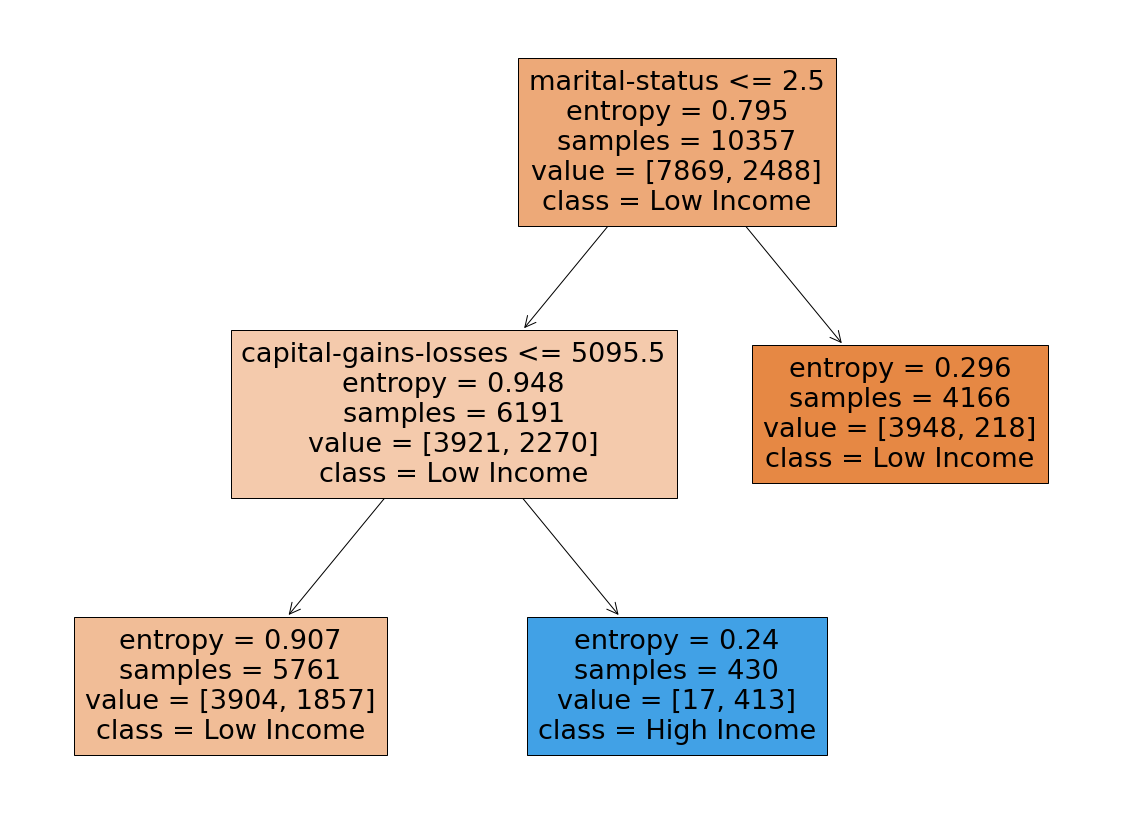

In [ ]:
#C5
c5_classifier_mln3 = makeDTModel("entropy", x_train, y_train, max_leaf_nodes=3)
displayTree(c5_classifier_mln3, x_train, class_names)

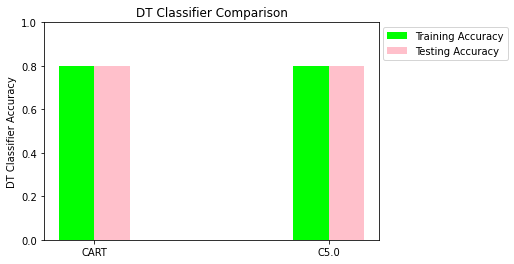

In [ ]:
#Compare mln3 models
compareModels(cart_classifier_mln3, c5_classifier_mln3, x_train, y_train, x_test, y_test)

##Max_Leaf_Nodes = 4

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1



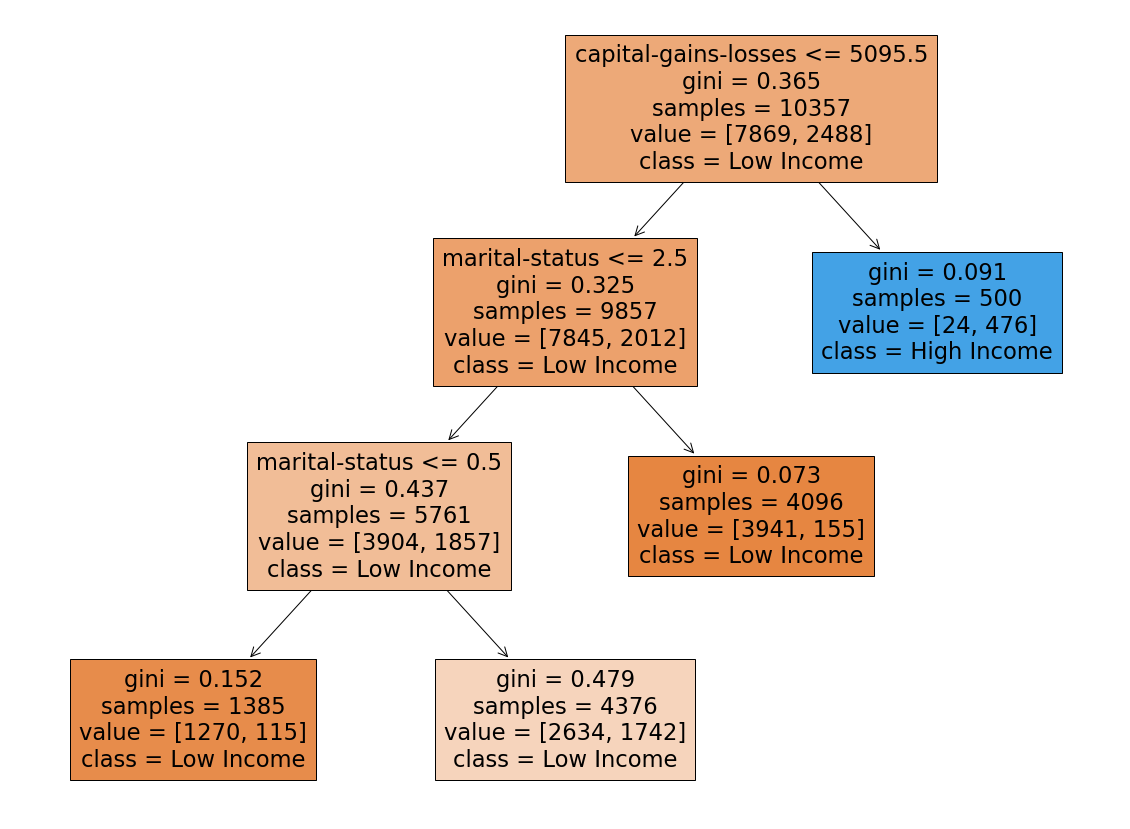

In [ ]:
#Cart
cart_classifier_mln4 = makeDTModel("gini", x_train, y_train, max_leaf_nodes=4)
displayTree(cart_classifier_mln4, x_train, class_names)

Confusion matrix:
[[3361   13]
 [ 859  207]]


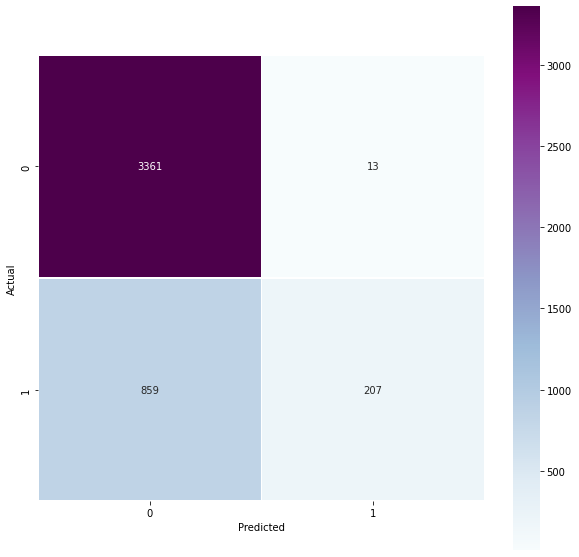

In [ ]:
#Cart mln4 confusion matrix
createCM(cart_classifier_mln4, labels, x_test, y_test)

|--- marital-status <= 2.50
|   |--- capital-gains-losses <= 5095.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- class: 0
|   |--- capital-gains-losses >  5095.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- class: 0



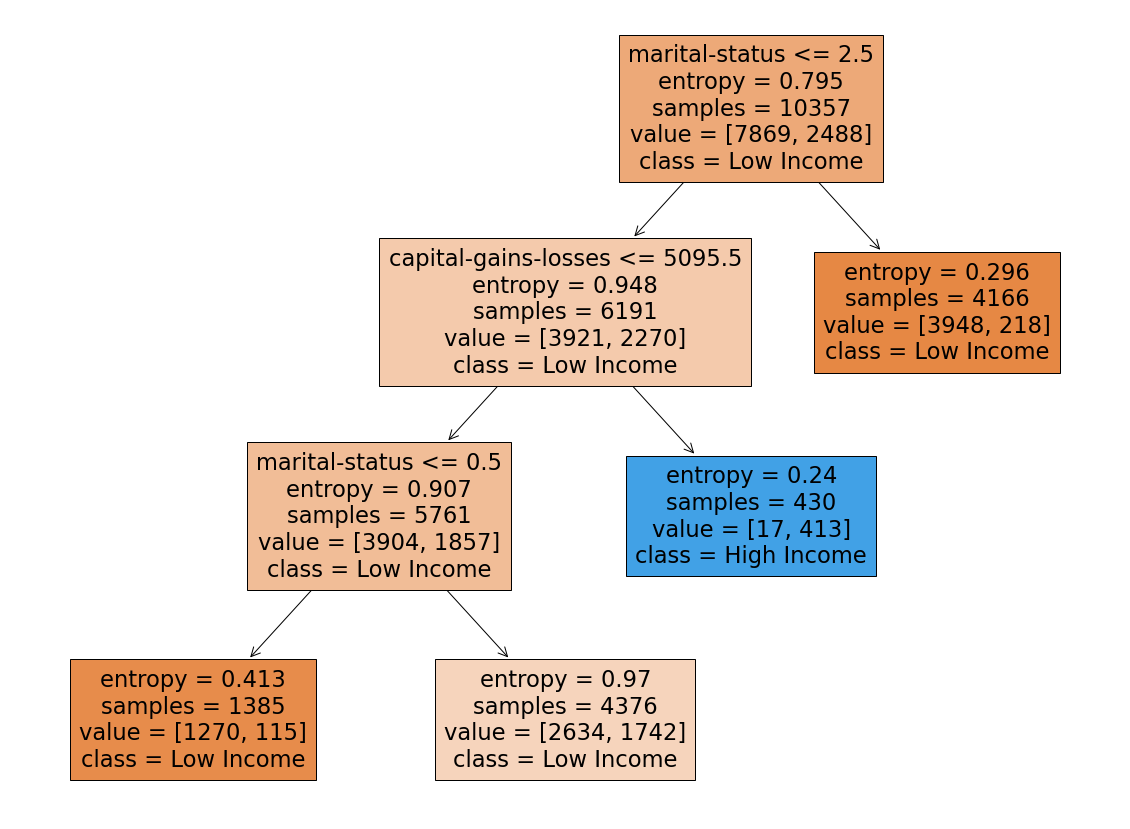

In [ ]:
#Cart
c5_classifier_mln4 = makeDTModel("entropy", x_train, y_train, max_leaf_nodes=4)
displayTree(c5_classifier_mln4, x_train, class_names)

Confusion matrix:
[[3367    7]
 [ 881  185]]


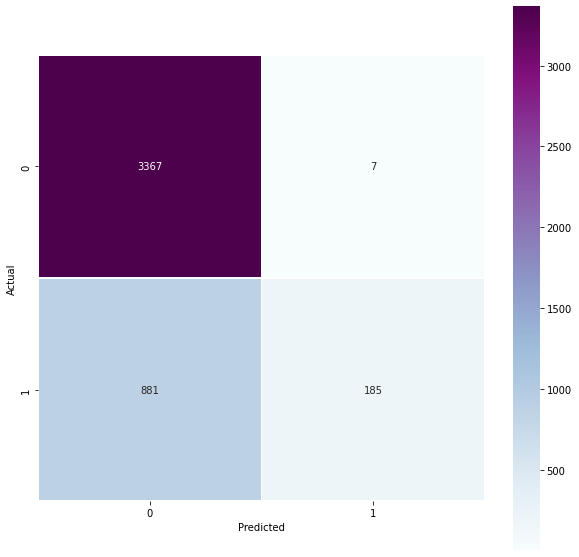

In [ ]:
#C5 mln4 confusion matrix
createCM(c5_classifier_mln4, labels, x_test, y_test)

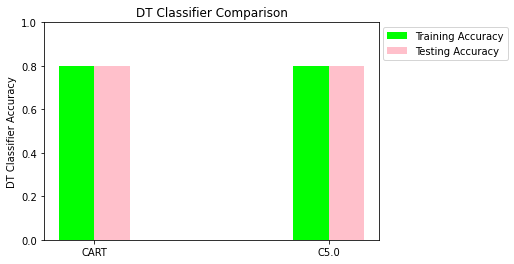

In [ ]:
#Compare mln4 models
compareModels(cart_classifier_mln4, c5_classifier_mln4, x_train, y_train, x_test, y_test)

##Max_Leaf_Nodes = 5

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- capital-gains-losses <= 1822.50
|   |   |   |   |--- class: 0
|   |   |   |--- capital-gains-losses >  1822.50
|   |   |   |   |--- class: 1
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1



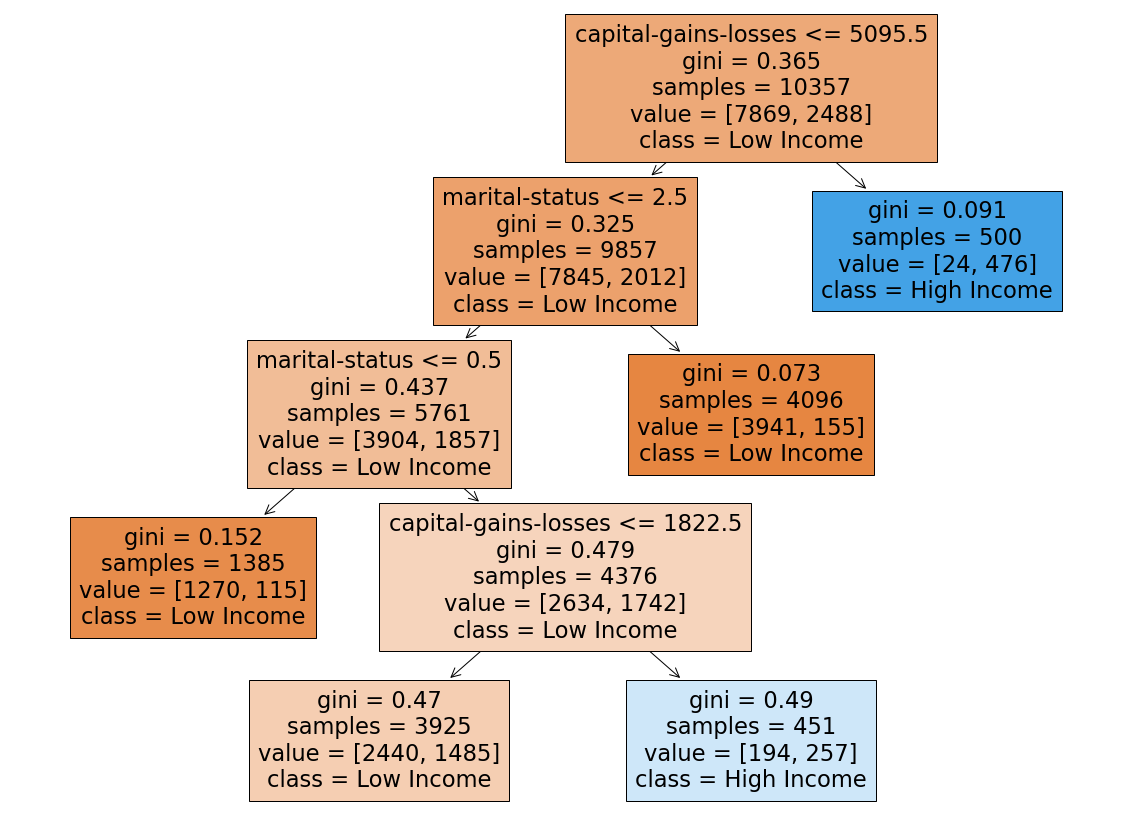

In [ ]:
#Cart
cart_classifier_mln5 = makeDTModel("gini", x_train, y_train, max_leaf_nodes=5)
displayTree(cart_classifier_mln5, x_train, class_names)

Confusion matrix:
[[3287   87]
 [ 753  313]]


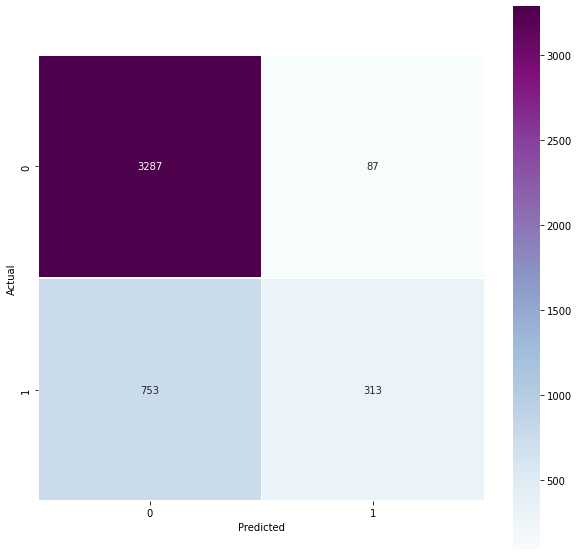

In [ ]:
#Cart mln5 confusion matrix
createCM(cart_classifier_mln5, labels, x_test, y_test)

|--- capital-gains-losses <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- marital-status <= 0.50
|   |   |   |--- class: 0
|   |   |--- marital-status >  0.50
|   |   |   |--- capital-gains-losses <= 1822.50
|   |   |   |   |--- class: 0
|   |   |   |--- capital-gains-losses >  1822.50
|   |   |   |   |--- class: 1
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gains-losses >  5095.50
|   |--- class: 1



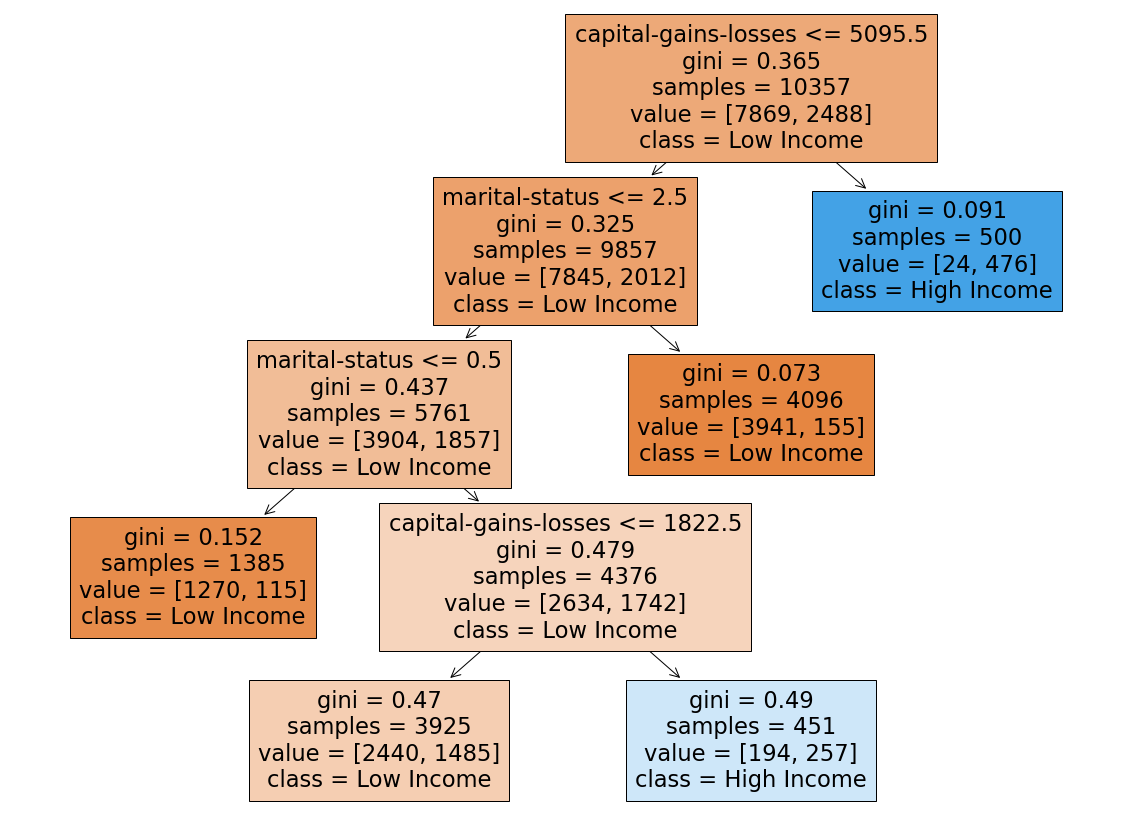

In [ ]:
#C5
c5_classifier_mln5 = makeDTModel("entropy", x_train, y_train, max_leaf_nodes=5)
displayTree(cart_classifier_mln5, x_train, class_names)

Confusion matrix:
[[3356   18]
 [ 859  207]]


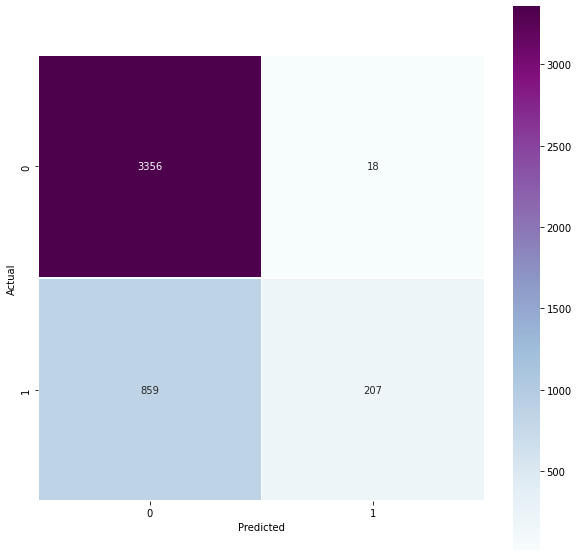

In [ ]:
#Cart mln5 confusion matrix
createCM(c5_classifier_mln5, labels, x_test, y_test)

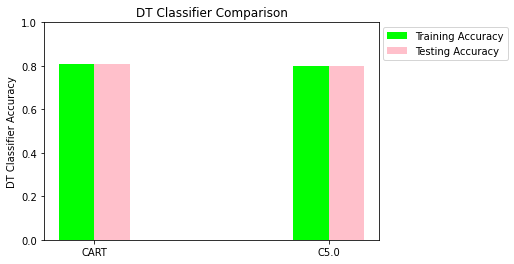

In [ ]:
#Compare mln5 models
compareModels(cart_classifier_mln5, c5_classifier_mln5, x_train, y_train, x_test, y_test)

##Summary

In summary the first test in which the tree had no depth or leaf node limit did produce the highest classification accuray, but only very slightly. Limiting the tree to a max depth of 2 produced only a 3% drop off in classification accuracy. The same was observed for a max depth of 3, and 4 as well, with those classification accuracies being about 80%. The same was also observed with limiting the amount of leaf nodes, for a limit of 3,4 and 5 leaf nodes the classification accuracy still did not deviate more then 2 to 3% from the 82% classification accuracy found in the first test. This tells me that by reducing the original dataset to just two attributes, capital-gains-losses and marital status, the new dataset became very simple for a decision tree and the same classification accuracy can be found by limiting resoruces. This same behavoir would most likley not be found if the full dataset had been used instead of the two attributes seleceted. 